Especialización en Analítica y Ciencia de Datos

Universidad de Antioquia - ML2

Febrero 2024

Melissa Ortega Alzate CC.1036964792

# Packages

In [142]:
# system
import os

# Data manipulation
import cv2
import numpy as np

# Visualization
import matplotlib.pyplot as plt

# Logistic Regression
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, metrics
from sklearn.metrics import accuracy_score

# Warnings ignoring
import warnings
warnings.filterwarnings("ignore")

# 1. Simulate any random rectangular matrix A...

In [143]:
# Generate and print matrix A
A = np.random.rand(3,5)
A

array([[0.10288866, 0.95342339, 0.30030971, 0.02893226, 0.35716142],
       [0.78115757, 0.0306889 , 0.97870848, 0.73586423, 0.5774094 ],
       [0.42386574, 0.94412025, 0.35708441, 0.63386137, 0.5714732 ]])

In [144]:
# 1.1  What is the rank and trace of A?
print(f'The rank of A matrix is: ', np.linalg.matrix_rank(A))
print(f'The trace of A matrix is: ', round(np.trace(A), 3))

The rank of A matrix is:  3
The trace of A matrix is:  0.491


* The rank of a matrix is the maximum number of linearly independent vectors that can be obtained from the matrix.

* The trace of a matrix is the sum of the elements on its main diagonal. For rectangular matrices, it is the trace of a square matrix formed by the multiplication of the original rectangular matrix by its transpose:

* tr(A) = tr(A^T A)

* Note: the trace of a matrix is equal to the sum of its eigenvalues.

In [145]:
# 1.2 What is the determinant of A?
# print(f'The determinant of A matrix is: ', np.linalg.det(A))

print('LinAlgError: Last 2 dimensions of the array must be square')

LinAlgError: Last 2 dimensions of the array must be square


El determinante es una medida que se aplica específicamente a matrices cuadradas y no tiene una definición directa o única para matrices rectangulares. El cálculo del determinante implica ciertas propiedades específicas de las matrices cuadradas, como la la existencia de una matriz inversa única. Estas propiedades no se aplican a las matrices rectangulares, ya que no son cuadradas y, por lo tanto, no pueden tener una inversa.

Nota: Una matriz cuadrada es invertible si y solo si su determinante es diferente de cero. Y un conjunto de vectores es linealmente independiente si y solo si el determinante de la matriz formada por estos vectores es diferente de cero.

In [146]:
# 1.3 Can you invert A? How?

# print(f'The inverse of A matrix is: \n', np.linalg.inv(A))
A_pseudoinverse = np.linalg.pinv(A)
print(f'The pseudo-inverse of A matrix is: \n\n', A_pseudoinverse)

The pseudo-inverse of A matrix is: 

 [[-0.24964077  0.2833375   0.16351177]
 [ 0.6575187  -0.36918328  0.34396702]
 [ 1.38314935  0.94983389 -1.47112044]
 [-1.67185981 -0.29079562  1.66111954]
 [ 0.08900457  0.12880671  0.13708675]]


- Una matriz rectangular no tiene la propiedad de la invertibilidad. La inversa de una matriz cuadrada, es una matriz tal que al multiplicarla por 
A se obtiene la matriz identidad I. Por lo tanto, no es posible usar np.lingalg.inv(A) sino que se implementa el método np.lingalg.pinv(A) para calcular la **pseudoinversa A+**. "Esto puede ser útil en situaciones donde necesitas para trabajar con sistemas sobredeterminados o indeterminados, en donde la matriz no es invertible pero se obtiene una aproximación de su inversa."

- Sin embargo, implmentar este útlimo método implica pérdida computacional. *Porque?*

- A_pse = V @ S_pse @ U.T
- So, pinv calulate first U, S and Vt. Then S_pse which is a zero matrix transpose. Then reconstruct the pseudoinverse.


In [147]:
# Verify
A_pseudoinverse.dot(A)

array([[ 0.26495306, -0.07494326,  0.26072277,  0.30491905,  0.16788228],
       [-0.07494326,  0.94031011, -0.04103829, -0.03461785,  0.21823835],
       [ 0.26072277, -0.04103829,  0.8196695 , -0.19351999,  0.2017447 ],
       [ 0.30491905, -0.03461785, -0.19351999,  0.79056272,  0.18425335],
       [ 0.16788228,  0.21823835,  0.2017447 ,  0.18425335,  0.18450461]])

In [148]:
# 1.4 How are eigenvalues and eigenvectors of A’A and AA’ related?

# Calculating A'
A_transpose = np.transpose(A)
print(f'The transpose of A matrix is: \n\n', A_transpose)

The transpose of A matrix is: 

 [[0.10288866 0.78115757 0.42386574]
 [0.95342339 0.0306889  0.94412025]
 [0.30030971 0.97870848 0.35708441]
 [0.02893226 0.73586423 0.63386137]
 [0.35716142 0.5774094  0.5714732 ]]


In [149]:
# Printing A'A
A_transpose @ A

array([[0.80045539, 0.52224955, 0.94677986, 0.84647483, 0.73002349],
       [0.52224955, 1.80132101, 0.65348842, 0.64860891, 0.89778552],
       [0.94677986, 0.65348842, 1.1755655 , 0.95522722, 0.87643869],
       [0.84647483, 0.64860891, 0.95522722, 0.94411347, 0.79746319],
       [0.73002349, 0.89778552, 0.87643869, 0.79746319, 0.78754751]])

In [150]:
# Printing AA'
A @ A_transpose

array([[1.13818952, 0.63106601, 1.27344044],
       [0.63106601, 2.44391704, 1.50597139],
       [1.27344044, 1.50597139, 1.92689633]])

In [151]:
# Calculate the eigenvalues and vectors of AA'
eigenvalues_AAT, eigenvectors_AAT = np.linalg.eig(A @ A_transpose)

# Calculate the eigenvalues and vectors of A'A
eigenvaluesA_TA, eigenvectors_A_TA = np.linalg.eig(A_transpose @ A)

In [152]:
# Compare the results eigen values
print('The eigenvalues of A * A_T : \n', eigenvalues_AAT)
print('\nThe eigenvalues of A_T * A : \n', eigenvaluesA_TA)

The eigenvalues of A * A_T : 
 [4.27134593 0.0960803  1.14157665]

The eigenvalues of A_T * A : 
 [ 4.27134593e+00  1.14157665e+00  9.60803024e-02  1.67210312e-17
 -2.74024489e-17]


- Matriz AA' :Esta matriz resulta de multiplicar A por su transpuesta. Contiene información sobre cómo las filas de A se relacionan entre sí.
- Matriz A'A: Esta matriz resulta de multiplicar la transpuesta de A por A. Contiene información sobre cómo las columnas de A se relacionan entre sí.





- Cuando son cuadradas estas dos matrices son simétricas, y tienen los mismos valores propios. Las dos matrices tienen los mismos valores propios no negativos ==> *Teorema de los valores propios de matrices simétricas*, *Teorema espectral* para matrices cuadradas.

In [153]:
# Compare the results eigen values
print('The eigenvectors of A * A_T : \n', eigenvectors_AAT)
print('\nThe eigenvectors of A_T * A : \n', eigenvectors_A_TA)

The eigenvectors of A * A_T : 
 [[-0.39281347 -0.68202291  0.61688113]
 [-0.66183072 -0.25608066 -0.70455858]
 [-0.63849642  0.68503098  0.35079178]]

The eigenvectors of A_T * A : 
 [[-4.00656834e-01 -3.16546288e-01  6.50047061e-02 -8.02855323e-02
  -6.43972755e-01]
 [-4.82718573e-01  8.40207621e-01 -3.66611977e-02 -2.35325428e-01
  -2.16269010e-01]
 [-4.80810407e-01 -3.54758055e-01 -6.80174662e-01 -2.66617744e-01
   3.27473650e-02]
 [-4.36972221e-01 -2.60432778e-01  7.29241228e-01 -2.53436411e-01
   7.70069645e-02]
 [-4.29340786e-01  1.30802014e-02  6.83806291e-05  8.96025190e-01
   7.29057161e-01]]


Para una matriz cuadrada A, los vectores propios de AA' y A'A son los mismos debido a la propiedad de similitud de matrices. Sin embargo, en el caso de una matriz rectangular generalmente tienen diferentes vectores propios. *Porque los mismos valores porpios pero no vectores propios?*

* Para calcular los autovalores y autoverctores de la matriz A, esta debe ser cuadrada.
* La matriz A tendrá tantos autovalores como dimensión tenga A.
* Los autovalores pueden repetirse.
* Estos autovalores son los que forman los autovectores.

* ==> Son vectores que aún cuando se aplica alguna transformación a la matriz, éstos no cambian ypor lo tanto, desde esos autovectores se pueda generar todo el espacio o demás vectores

# 2. Add a steady, well-centered picture of your face...


In [154]:
# Reading the photo
my_original_face = cv2.imread("melissa_ortega_color.jpeg")

# Printing original photo features
print("==" * 5 + " Original photo " + "==" * 5)
print(f"The size of the photo is: {my_original_face.shape} pixeles" )
print(f"The type of the file is: {my_original_face.dtype}")
print(f"The pixels range is: {my_original_face.min()} - {my_original_face.max()}")

# Resizing the photo
my_edited_face = cv2.cvtColor(my_original_face, cv2.COLOR_BGR2GRAY)
my_edited_face = cv2.resize(my_edited_face, (256, 256))
print("\n" + "==" * 5 + " Edited photo " + "==" * 5)
print(f"El nuevo tamaño de la figura es: {my_edited_face.shape} pixeles" )

========== Original photo ==========
The size of the photo is: (1000, 1000, 3) pixeles
The type of the file is: uint8
The pixels range is: 0 - 255

========== Edited photo ==========
El nuevo tamaño de la figura es: (256, 256) pixeles


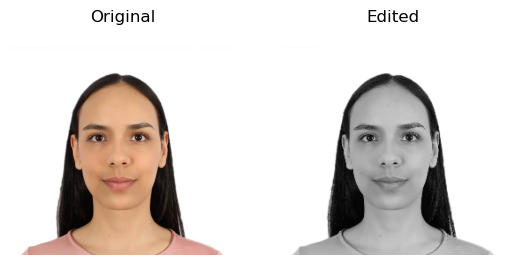

In [155]:
# Create the figure
fig, axs = plt.subplots(1, 2)

# Plot the original image
axs[0].imshow(cv2.cvtColor(my_original_face, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original')
axs[0].axis('off')

# Plot the edited image
axs[1].imshow(my_edited_face, cmap='gray')
axs[1].set_title('Edited')
axs[1].axis('off')

# Show the figure
plt.show()

In [156]:
# Get the list of file names in the directory 'images'
images = os.listdir('Fotos ML2')
faces = []

# Read the images and resize them
for i in images:
    image_path = os.path.join('Fotos ML2', i)
    img = cv2.imread(image_path)

    if img is not None:
        img_resized = cv2.resize(img, (256, 256))
        faces.append(img_resized)

libpng warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


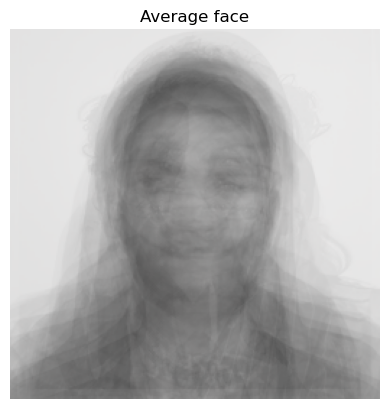

In [157]:
# Convert the list to a numpy array
faces_array = np.array(faces)

# Calculate the average face of the group
average_face = np.mean(faces_array, axis=0)

# Show the average face image
plt.imshow(average_face.astype(np.uint8))
plt.title('Average face')
plt.axis('off')
plt.show()

In [158]:
# Ajusting average face
average_face = np.uint8(average_face)
average_face = cv2.cvtColor(average_face, cv2.COLOR_BGR2GRAY)

# Why should I adjust the image again?

In [159]:
# Calculate the distance between my_face and the average_face
mse = np.mean((my_edited_face - average_face) ** 2)                             # Mean Squared Error
mad = round(np.mean(np.abs(my_edited_face - average_face)), 3)                  # Mean absolute difference
euclidean_distance = np.linalg.norm(my_edited_face - average_face)              # Euclidian distance
manhattan_distance = round(np.sum(np.abs(my_edited_face - average_face)), 3)    # Manhattan distance

print("\n" + "==" * 7 + " Distances " + "==" * 7)
print("1. Error cuadrático medio:", mse)
print("2. Diferencia absoluta media:", mad)
print("3. Distancia de Manhattan:"   , manhattan_distance)
print("4. Distancia euclidiana:"     , euclidean_distance)



============== Distances ==============
1. Error cuadrático medio: 119.3214111328125
2. Diferencia absoluta media: 67.503
3. Distancia de Manhattan: 4423896
4. Distancia euclidiana: 21940.459247700353


1. **Mean Squared Error:** is a measure of the total amount of error between the two images. A lower MSE indicates a smaller difference between the images.

2. **Mean Absolute Difference (MAD):** It's the average absolute difference between pixel values across images. It helps quantify the overall discrepancy between images, *regardless of their direction*. Higher MAD suggests greater dissimilarity, while lower MAD indicates higher similarity. For example, my photo's pixels differ by an average of about 66,745 units from the image's pixels.

3. **Manhattan distance:** It measures how much images differ in terms of their pixel values. It has no defined range, and its value depends on the magnitude of differences in pixel values between the images being compared. Manhattan distance is useful when the difference in one dimension is more significant than in another, or when dimensions are independent.

4. **Euclidean distance:** It's a measure of geometric distance in a multidimensional feature space. The higher the value of this measure, the greater the discrepancy between images in terms of Euclidean distance. The Euclidean distance between images in this feature space is approximately 21722.938 units. *Euclidean distance considers both the magnitude and direction* of differences between images.

*Which one is the best criteria?*

# 3. The unsupervised Python package

In [160]:
# See unsupervised folder

from unsupervised.dim_red import my_pca
from unsupervised.dim_red import my_svd
from unsupervised.dim_red import my_tsne

PCA
* https://github.com/rushter/MLAlgorithms/blob/master/mla/pca.py 
* https://github.com/patchy631/machine-learning/blob/main/ml_from_scratch/PCA_from_scratch.ipynb
* https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA 


TSNE
https://github.com/rushter/MLAlgorithms/blob/master/mla/tsne.py 

SVD
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html 

- Fit_transform to training set: both fit a transformation model to the training data and apply the learned transformation to the same data.

- Transform: apply the learned transformation from the training data to the test set.

# 4. Apply SVD over the picture of your face

In [161]:
# Apply Singular Value Decomposition (SVD) using the unsupervised package
svd_instance = my_svd.SVD()

# Fit the SVD model to the data
U, S, Vt = svd_instance.fit(my_edited_face)

# Information
print("\n" + "==" * 7 + " Matrix descomposition " + "==" * 7)
print("Dimensión de la matriz de vectores singulares izquierdos:",     U.shape)
print("Dimensión de la matriz de la matriz diagonal de valores:",      S.shape)
print("Dimensión de la matriz de vectores singulares derechos::",      Vt.shape)


============== Matrix descomposition ==============
Dimensión de la matriz de vectores singulares izquierdos: (256, 256)
Dimensión de la matriz de la matriz diagonal de valores: (256,)
Dimensión de la matriz de vectores singulares derechos:: (256, 256)


MSE with 1 values: 2182.770119845861
MSE with 6 values: -2.0205206199455468
MSE with 11 values: -0.0184090274586296
MSE with 16 values: -0.0007614716334019833
MSE with 21 values: 0.00011862795323201031
MSE with 26 values: 0.00022064405620950047
MSE with 31 values: 2.6444559971414432e-05
MSE with 36 values: 1.2427436933998932e-05
MSE with 41 values: 9.51070318245341e-06


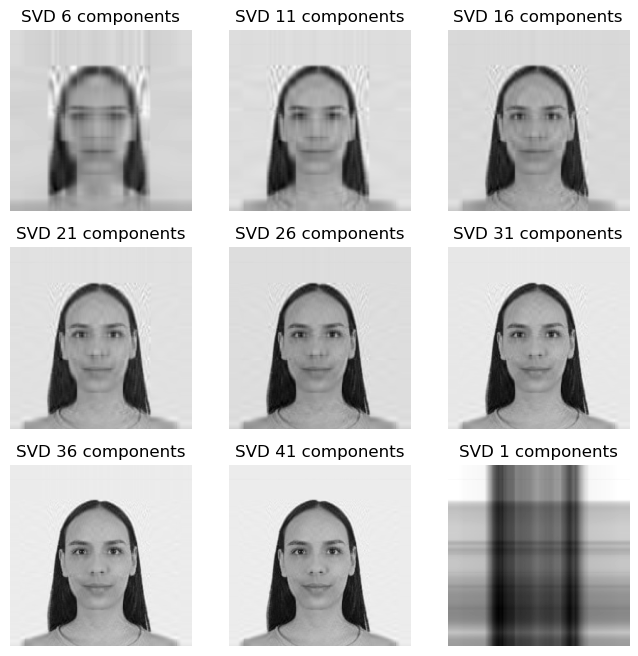

In [162]:
# Define the maximum allowable MSE to consider it zero
max_mse = 0.00001  

# Initialize variables
i = 1
mse_values = []

# Set up the figure
fig, axs = plt.subplots(3, 3, figsize=(8, 8))

# Start while loop
while True:
    # Reconstruct the image using i components
    reconstructed_img = np.matrix(U[:, :i]) * np.diag(S[:i]) * np.matrix(Vt[:i, :])

    # Plot the reconstructed image
    ax = axs.flatten()[i//5 - 1]                    # Adjusting index for subplot
    ax.imshow(reconstructed_img, cmap='gray')
    ax.set_title(f'SVD {i} components')
    ax.axis('off')

    # Compute the MSE between the original and reconstructed images
    mse = np.mean((my_edited_face - reconstructed_img) ** 2)
    mse_values.append(mse)

    # Print the MSE
    print(f'MSE with {i} values: {mse}')

    # Check if the absolute value of the MSE is close to zero
    if abs(mse) < max_mse:
        break

    # Increment i by 5 for the next iteration
    i += 5

plt.show()


- Now I have **31** vectors and not 256 and still recognized the image.

- Why I have Vt.T in svd module?

- Negative MSE values can occur due to various reasons, such as numerical precision issues, errors in the calculation, or inconsistencies in the data. In most cases, MSE should be non-negative since it measures the average squared difference between the original and reconstructed values. However, if there are inaccuracies or inconsistencies in the data or the calculation process, it's possible to get negative MSE values.

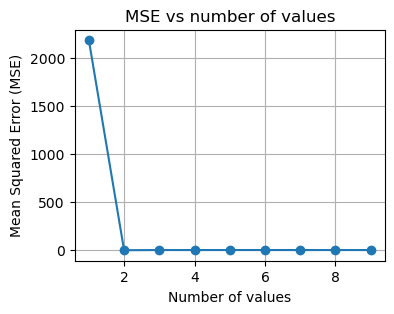

In [163]:
# Plot RMSE vs number of components
plt.figure(figsize=(4, 3))
plt.plot(range(1, len(mse_values) + 1), mse_values, marker='o', linestyle='-')
plt.title('MSE vs number of values')
plt.xlabel('Number of values')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()

By using more singular values, we can reconstruct the image with greater accuracy.To determine the point at which the image is reproduced adequately, we could visualize the reconstructed image using different quantities of singular values or calculate the distance between de reconstructed and original image.

# 5. Train a naive logistic regression on raw MNIST images

In [164]:
# Load the dataset
digits = datasets.load_digits()

# Filter the dataset to only include digits 0 and 8
filters = (digits.target == 0) | (digits.target == 8)
X = digits.images[filters]
y = digits.target[filters]

# Data set description
print("Number of 0:", np.sum(y == 0))
print("Number of 8:", np.sum(y == 8))

Number of 0: 178
Number of 8: 174


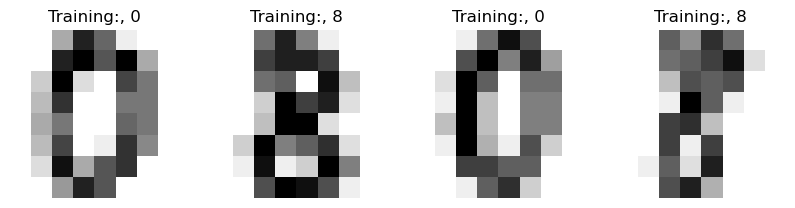

In [165]:
# Preview some images
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))

for ax, image, label in zip(axes, X, y):
    ax.set_axis_off()
    ax.imshow(image, cmap='gray_r')
    ax.set_title(f'Training:, {label}' )

In [166]:
# flatten the images
n_samples = len(X)
X = X.reshape((n_samples, -1))

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

# Initialize the logistic regression model
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

# Predict the value of the digit on the test subset
y_pred = logistic_regression.predict(X_test)

# Calculate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the logistic regression model:", accuracy)

print(
    '========================================\n'
    f"Classification report for classifier:\n"
    f"{metrics.classification_report(y_test, y_pred)}\n"
)

Accuracy of the logistic regression model: 1.0
Classification report for classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           8       1.00      1.00      1.00        53

    accuracy                           1.00       106
   macro avg       1.00      1.00      1.00       106
weighted avg       1.00      1.00      1.00       106




# 6. Now, apply dimensionality reduction using all your algorithms

In [167]:
# Data in training and test sets
print('\n'+"==" * 4 + " Original training set dimensions " + "==" * 4)
print("Number of images in training set:", X_train.shape[0])
print("Number of features (pixels) in training set:", X_train.shape[1])

print('\n'+"==" * 4 + " Original test set dimensions " + "==" * 4)
print("Number of samples in test set:", X_test.shape[0])
print("Number of features (pixels) in test set:", X_test.shape[1])


======== Original training set dimensions ========
Number of images in training set: 246
Number of features (pixels) in training set: 64

======== Original test set dimensions ========
Number of samples in test set: 106
Number of features (pixels) in test set: 64


In [168]:
from unsupervised.dim_red.my_svd import SVD

# Apply SVD using the unsupervised package
svd = SVD(n_components=2)
X_my_svd_train = svd.fit_transform(X_train)
X_my_svd_test = svd.transform(X_test)

# Train a logistic regression model using the reduced datasets
logistic_regression.fit(X_my_svd_train, y_train)
y_my_pred_svd = logistic_regression.predict(X_my_svd_test)
accuracy_my_svd = accuracy_score(y_test, y_my_pred_svd)
accuracy_my_svd

0.9905660377358491

# 7. Repeat the process above but now using the built-in algorithms in the Scikit-Learn

In [169]:
from sklearn.decomposition import PCA

# Perform dimensionality reduction with PCA
pca = PCA(n_components = 2)
X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.transform(X_test)

# Train a logistic regression model using the reduced datasets
logistic_regression.fit(X_pca_train, y_train)
y_pred_pca = logistic_regression.predict(X_pca_test)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

In [170]:
from sklearn.decomposition import TruncatedSVD

# Perform dimensionality reduction with SVD
svd = TruncatedSVD(n_components=2)
X_svd_train = svd.fit_transform(X_train)
X_svd_test = svd.transform(X_test)

# Train a logistic regression model using the reduced datasets
logistic_regression.fit(X_svd_train, y_train)
y_pred_svd = logistic_regression.predict(X_svd_test)
accuracy_svd = accuracy_score(y_test, y_pred_svd)

In [171]:
from sklearn.manifold import TSNE

# Perform dimensionality reduction with t-SNE
tsne = TSNE(n_components=2)
X_tsne_train = tsne.fit_transform(X_train)
X_tsne_test = tsne.fit_transform(X_test)

# Train a logistic regression model using the reduced datasets
logistic_regression.fit(X_tsne_train, y_train)
y_pred_tsne = logistic_regression.predict(X_tsne_test)
accuracy_tsne = accuracy_score(y_test, y_pred_tsne)

In [172]:
# Print the results
print("==" * 4 + " Accuracy using reduced charecteristics " + "==" * 4)
print("PCA",     accuracy_pca)
print("SVD:",    accuracy_svd)
print("t-SNE:",  accuracy_tsne)

======== Accuracy using reduced charecteristics ========
PCA 0.9905660377358491
SVD: 0.9905660377358491
t-SNE: 1.0


- t-SNE had the better performance: t-student distribution, more robust. T-distributed Stochastic Neighbor Embedding

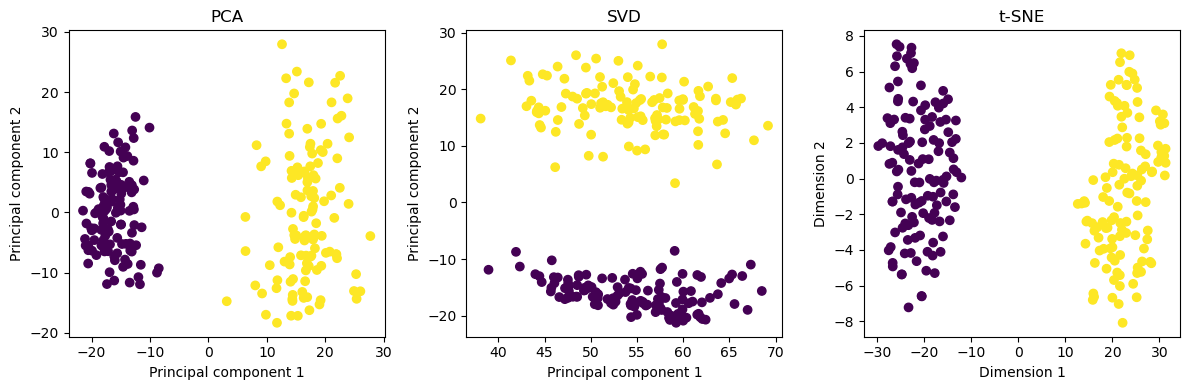

In [173]:
import matplotlib.pyplot as plt

# Create a new figure with specified size
plt.figure(figsize=(12, 4))

# Plot the results for PCA
plt.subplot(1, 3, 1)
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=y_train)
plt.title('PCA')  
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')

# Plot the results for SVD
plt.subplot(1, 3, 2)
plt.scatter(X_svd_train[:, 0], X_svd_train[:, 1], c=y_train)
plt.title('SVD')  
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')

# Plot the results for t-SNE
plt.subplot(1, 3, 3)
plt.scatter(X_tsne_train[:, 0], X_tsne_train[:, 1], c=y_train)
plt.title('t-SNE')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

# Display the figure
plt.tight_layout() 
plt.show()

**Analysis**
- t-SNE take 4 times more than the other two algorithms, because it is an iterative process.
- I can visually inspect how the data is separated in the reduced feature space. Additionally, you can compare the performance of the model trained with the reduced datasets to the performance of the model trained with the original dataset to see if dimensionality reduction impacts the model's performance.

- *How different are these results from those of your implementation? Why?*

- This is a 2D dimensions representation of the characteristic of the 8x8 images
- *x* and *y* axes represent the two new features generated by each dimensionality reduction algorithm
- It is more evident the separation using t-SNE algorithm

For PCA and SVD:
- The x-axis represents the first principal component.
- The y-axis represents the second principal component.
- The scale on these axes depends on the values of the principal components. Each point in the plot represents a sample (a row) from the training dataset, projected onto the space of the first two principal components.

**Variance:** 
- PCA and t-SNE: Most of the variance is representated vertically
- SVD: Most of the variance is representated horizontally

For t-SNE:
- The x-axis represents the first dimension of the data transformed by t-SNE.
- The y-axis represents the second dimension of the data transformed by t-SNE.
- The scale on these axes doesn't correspond to any specific measure in the original data. t-SNE is a nonlinear dimensionality reduction technique that focuses on preserving the local structure of the data, so the units on these axes don't have a direct physical meaning. The points in the plot represent samples from the training dataset, projected into the two-dimensional space created by t-SNE.

**Componentes direction**

- PCA attempts to find orthogonal axes in the data that maximize the variance. As a result, the principal components (PCs) can capture the direction of maximum variance in the data. 

- t-SNE is a nonlinear dimensionality reduction technique that focuses on preserving the local structure of the data. It tries to represent the similarity between data points in a lower-dimensional space. This often results in clusters being grouped together more compactly compared to PCA.

- SVD decomposes the data matrix into three matrices: U, S, and Vt. The rows of the V matrix represent the principal directions of the data. Therefore, the clusters in SVD plots may appear horizontally aligned because each row of the V matrix represents a principal direction capturing the variance in the data.

# 8

Normalizar: dividir por la norma, centrar las columnas

# 9 and 10

In [174]:
# See "Study.docx"

# Bibliografía

- https://nbviewer.org/github/fastai/numerical-linear-algebra/blob/master/nbs/3.%20Background%20Removal%20with%20Robust%20PCA.ipynb

- Documentación oficial de NumPy (Acceso: 2024). Disponible en: https://numpy.org/doc/stable/reference/arrays.scalars.html#numpy.uint

- Documentación oficial de Pandas (Acceso: 2024). Disponible en: https://pandas.pydata.org/docs/user_guide/basics.html#dtypes

- Documentación oficial de Linear algebra (Acceso: 2024). Disponible en: https://numpy.org/doc/stable/reference/routines.linalg.html

- Curso de Álgebra lineal para Machine Learning (Acceso: 2024) - Plazti. Disponbile en: https://platzi.com/cursos/algebra-ml/?ada_source=conversation

- Youtube. Análisis de componentes principales (PCA) - Video (Acceso: 2024). Disponible en: https://www.youtube.com/watch?v=AniiwysJ-2Y

